In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import sklearn 
import os 
import matplotlib.pyplot as plt
import seaborn as sns # Seaborn is a Python data visualization library based on matplotlib. 
%matplotlib inline   
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
machakos_data = pd.read_csv('Final_preprocessing_dataset.csv')

In [3]:
machakos_data.head(5)

,Year,Unemployment Rate (%),Inflation Rate,Labour Force,Nominal GDP prices (Ksh Million),Annual GDP growth (%),Real GDP prices (Ksh Million),population growth,"Population, total",Urban population growth (annual %),Adjusted net national income per capita (annual % growth),Adjusted savings: education expenditure (current US$),"Labor force participation rate for ages 15-24, female (%) (modeled ILO estimate)","Labor force participation rate for ages 15-24, male (%) (modeled ILO estimate)","Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, male (% of male labor force) (modeled ILO estimate)","Unemployment, total (% of total labor force) (modeled ILO estimate)",Unnamed: 17
0,2000.0,3.13%,9.98,"12,114,213.00","967,838",0.0,"982,855",2.92,"30,851,606.00",0.07,-2.81,"645,127,096.87",50.46,46.89,3.37,2.89,3.13,NaN
1,2001.0,3.07%,5.73,"12,601,491.00","1,020,022",3.8,"1,020,111",3.03,"31,800,343.00",1.95,-1.09,"656,047,739.08",50.03,46.87,3.31,2.84,3.07,NaN
2,2002.0,3.09%,1.97,"13,103,364.00","1,035,374",0.5,"1,025,583",3.03,"32,779,823.00",0.67,-2.34,"755,517,161.80",49.61,46.84,3.33,2.86,3.09,NaN
3,2003.0,3.04%,9.81,"13,606,235.00","1,131,783",2.9,"1,055,658",2.97,"33,767,122.00",0.49,-2.44,"897,571,127.36",49.18,46.82,3.28,2.82,3.04,NaN
4,2004.0,3.00%,11.80,"14,125,163.00","1,274,328",5.1,"1,109,338",2.99,"34,791,836.00",5.82,2.7,"1,011,467,728.44",48.76,46.79,3.23,2.77,3.00,NaN


In [4]:
# The isnull() method is used to check and manage NULL values in a data frame.
machakos_data.isnull().sum()

Year                                                                                974
Unemployment Rate (%)                                                               974
Inflation Rate                                                                      974
Labour Force                                                                        974
Nominal GDP prices (Ksh Million)                                                    974
Annual GDP growth (%)                                                               974
Real GDP prices (Ksh Million)                                                       974
population growth                                                                   974
Population, total                                                                   974
Urban population growth (annual %)                                                  974
Adjusted net national income per capita (annual % growth)                           974
Adjusted savings: education expe

In [5]:
machakos_data.describe()

,Year,Inflation Rate,Annual GDP growth (%),population growth,"Labor force participation rate for ages 15-24, female (%) (modeled ILO estimate)","Labor force participation rate for ages 15-24, male (%) (modeled ILO estimate)","Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, male (% of male labor force) (modeled ILO estimate)","Unemployment, total (% of total labor force) (modeled ILO estimate)",Unnamed: 17
count,23.00000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,0.0
mean,2011.00000,7.613043,4.260870,2.563478,45.760435,45.752609,3.669565,3.233913,3.448261,NaN
std,6.78233,3.251344,2.246156,0.430503,2.896549,1.759202,1.006138,0.975121,0.991595,NaN
min,2000.00000,1.970000,-0.300000,1.910000,41.540000,41.960000,2.950000,2.580000,2.760000,NaN
25%,2005.50000,5.505000,3.350000,2.190000,43.365000,45.890000,3.055000,2.655000,2.855000,NaN
50%,2011.00000,6.580000,4.800000,2.660000,45.770000,46.650000,3.200000,2.770000,2.980000,NaN
75%,2016.50000,9.860000,5.350000,2.970000,48.125000,46.760000,3.545000,3.105000,3.325000,NaN
max,2022.00000,15.110000,8.100000,3.030000,50.460000,46.890000,5.940000,5.450000,5.640000,NaN


In [6]:
# Pandas info() function is used to get a concise summary of the dataframe.
machakos_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 18 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   Year                                                                              23 non-null     float64
 1   Unemployment Rate (%)                                                             23 non-null     object 
 2   Inflation Rate                                                                    23 non-null     float64
 3   Labour Force                                                                      23 non-null     object 
 4   Nominal GDP prices (Ksh Million)                                                  23 non-null     object 
 5   Annual GDP growth (%)                                                             23 non-null     float64
 6   Re

In [17]:
data = {'Labour Force': ['12,114,213.00', ' 10,532,100.50 ', '9,200,333.75']} 
machakos_data = pd.DataFrame(data)

# Remove commas, trim spaces, and convert to float
machakos_data['Labour Force'] = machakos_data['Labour Force'].replace({',': '', ' ': ''}, regex=True).astype(float)

print(machakos_data)

   Labour Force
0   12114213.00
1   10532100.50
2    9200333.75


## EDA

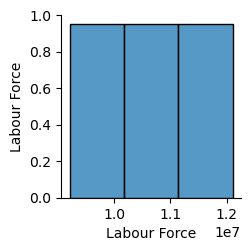

In [18]:
sns.pairplot(machakos_data)


In [20]:
sns.displot(machakos_data['Unemployment, total (% of total labor force) (modeled ILO estimate)'])

KeyError: 'Unemployment, total (% of total labor force) (modeled ILO estimate)'

## Training a Linear Regression Model
Regression is a supervised machine learning process. It is similar to classification, but rather than predicting a label, you try to predict a continuous value. Linear regression defines the relationship between a target variable (y) and a set of predictive features (x). Simply stated, If you need to predict a number, then use regression.

Let's now begin to train your regression model! You will need to first split up your data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. You will toss out the Address column because it only has text info that the linear regression model can't use.

X and y arrays

In [21]:
# Define the independent variables (excluding 'Year' and Unemployment-related columns for X)
X = machakos_data[['Inflation Rate', 'Labour Force', 'Nominal GDP prices (Ksh Million)', 
                   'Annual GDP growth (%)', 'Real GDP prices (Ksh Million)', 'population growth', 
                   'Population, total', 'Urban population growth (annual %)', 
                   'Adjusted net national income per capita (annual % growth)', 
                   'Adjusted savings: education expenditure (current US$)', 
                   'Labor force participation rate for ages 15-24, female (%) (modeled ILO estimate)', 
                   'Labor force participation rate for ages 15-24, male (%) (modeled ILO estimate)']]

# Define the dependent variable (Total Unemployment)
y = machakos_data['Unemployment, total (% of total labor force) (modeled ILO estimate)']

# Check the first few rows to confirm data is structured correctly
print(X.head())
print(y.head())


KeyError: "['Inflation Rate', 'Nominal GDP prices (Ksh Million)', 'Annual GDP growth (%)', 'Real GDP prices (Ksh Million)', 'population growth', 'Population, total', 'Urban population growth (annual %)', 'Adjusted net national income per capita (annual % growth)', 'Adjusted savings: education expenditure (current US$)', 'Labor force participation rate for ages 15-24, female (%) (modeled ILO estimate)', 'Labor force participation rate for ages 15-24, male (%) (modeled ILO estimate)'] not in index"

In [22]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
import pandas as pd

# Remove commas and spaces from the column in your dataset
X_train_cleaned = X_train.replace({',': '', ' ': ''}, regex=True)

# Convert the cleaned column to float
X_train_cleaned = X_train_cleaned.astype(float)

# Now fit the model
model.fit(X_train_cleaned, y_train)


ValueError: could not convert string to float: '..'

In [10]:
#Create a linear regression model
model = LinearRegression()

In [12]:
#Train the model
model.fit(X_train, y_train)

ValueError: could not convert string to float: ' 12,114,213.00 '

In [13]:
# Step 6: Make predictions on the test set
y_pred = model.predict(X_test)


ValueError: could not convert string to float: ' 17,354,366.00 '

In [14]:
# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

# Optional: Check the model's coefficients (the weight of each feature)
print("Model Coefficients:", model.coef_)

NameError: name 'y_pred' is not defined